In [36]:
import numpy as np
import matplotlib.pyplot as plt
import csv, datetime
import pandas as pd
import matplotlib.dates as mdates
import os, sys
from tqdm import tqdm


def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif line.count(":")==2:
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1970, 2, day, int(h), int(m), int(s)))
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db


#### 4-14-2023 TESTING ####
# r1 = MakeDataFromText("04-14-2023/RSSI_13295.csv")
# r2 = MakeDataFromText("04-14-2023/RSSI_56624.csv")
# r3 = MakeDataFromText("04-14-2023/RSSI_63331.csv")
# t1 = MakeDataFromText("04-14-2023/tags_13295.csv")
# t2 = MakeDataFromText("04-14-2023/tags_56624.csv")
# t3 = MakeDataFromText("04-14-2023/tags_63331.csv")

#### 4-17-2023 TESTING ####
r1 = MakeDataFromText("04-17-2023/RSSI_15795.csv")
r2 = MakeDataFromText("04-17-2023/RSSI_26986.csv")
r3 = MakeDataFromText("04-17-2023/RSSI_38140.csv")
r4 = MakeDataFromText("04-17-2023/RSSI_41245.csv")
r5 = MakeDataFromText("04-17-2023/RSSI_59038.csv")
r6 = MakeDataFromText("04-17-2023/RSSI_78212.csv")
r7 = MakeDataFromText("04-17-2023/RSSI_83325.csv")
r8 = MakeDataFromText("04-17-2023/RSSI_99892.csv")
r9 = MakeDataFromText("04-17-2023/RSSI_46179.csv")
t1 = MakeDataFromText("04-17-2023/tags_15795.csv")
t2 = MakeDataFromText("04-17-2023/tags_26986.csv")
t3 = MakeDataFromText("04-17-2023/tags_38140.csv")
t4 = MakeDataFromText("04-17-2023/tags_41245.csv")
t5 = MakeDataFromText("04-17-2023/tags_59038.csv")
t6 = MakeDataFromText("04-17-2023/tags_78212.csv")
t7 = MakeDataFromText("04-17-2023/tags_83325.csv")
t8 = MakeDataFromText("04-17-2023/tags_99892.csv")
t9 = MakeDataFromText("04-17-2023/tags_46179.csv")



temp = dict()
for d in [ t1,t2,t3,t4,t5,t6,t7,t8,t9 ]:
    for k,v in d.items():
        if k in temp: # if tag is already in dict
            for i in range(len(v[0])):
                if v[0][i] in temp[k]:
                    temp[k][v[0][i]].append(v[1][i])
                else:
                    temp[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            temp[k] = dict()
            for i in range(len(v[0])):
                temp[k][v[0][i]] = [v[1][i]]
for k,v in temp.items():
    for k2,v2 in v.items():
        temp[k][k2] = sum(v2)/len(v2)

rssi = dict()
for d in [ r1,r2,r3,r4,r5,r6,r7,r8,r9 ]:
    for k,v in d.items():
        if k in rssi: # if tag is already in dict
            for i in range(len(v[0])):
                if v[0][i] in rssi[k]:
                    rssi[k][v[0][i]].append(v[1][i])
                else:
                    rssi[k][v[0][i]] = [v[1][i]]
        else:             # if tag is not in dict
            rssi[k] = dict()
            for i in range(len(v[0])):
                rssi[k][v[0][i]] = [v[1][i]]
for k,v in rssi.items():
    for k2,v2 in v.items():
        rssi[k][k2] = sum(v2)/len(v2)

In [37]:
#### 4-14-2023 TESTING ####
# therm =  pd.read_csv( 'Smart Thermometer 1_export_202304141517.csv', skiprows=1, sep=',', header=0 )

#### 4-17-2023 TESTING ####
therm =  pd.read_csv('04-17-2023/Smart Thermometer 1_export_202304180927.csv', skiprows=1, sep=',', header=0)


therm.columns = [ 'Time', 'TempC', 'RelHumid' ]

new = []
for i in range(len(therm['Time'])):
    h,m,s = therm['Time'][i].split(':')
    day = 2 if int(h[-2:]) < 13 else 1
    new.append ( datetime.datetime(1970, 2, day, int(h[-2:]), int(m), int(s)))

therm['Time'] = new

In [38]:
previous = []
with open('Previous water temp data.txt', 'r') as file:
    reader = csv.reader(file)
    for l in reader:
        previous.append(float(l[0])) 

In [39]:
water =  pd.read_csv( '04-17-2023/04171337.TXT', skiprows=2, sep=',', header=0 )
water.columns = [ 'Time', 'placeholder', 'TempC' ]

new = []
nt = []
for i in range(len(water['Time'])):
    h,m,s = water['Time'][i].split(':')
    day = 2 if int(h[-2:]) < 13 else 1
    new.append ( datetime.datetime(1970, 2, day, int(h[-2:]), int(m), int(s)))
    nt.append(float(water['TempC'][i][:4]))

water['Time'] = new
water['TempC'] = nt
del new, nt

E282403E000207D6F9772B42
33333333335F5F5F30363943
31313131315F5F5F37373734
E282403E000207D6F9770B5D
32323232325F5F5F37463842


(31.541666666666668, 32.0)

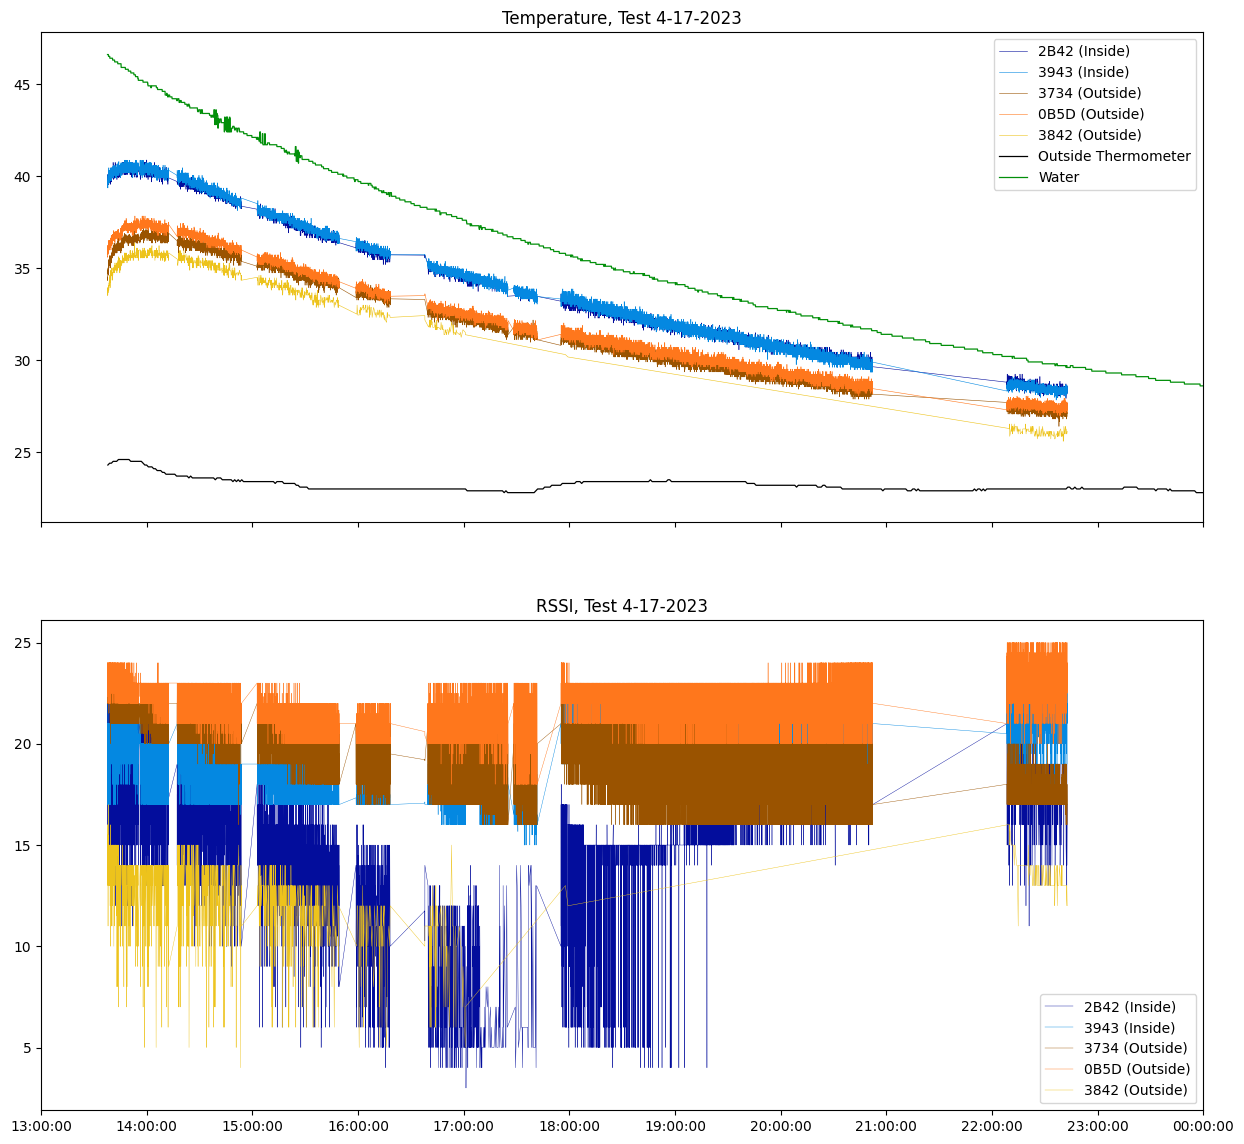

In [40]:
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(15, 14), sharex=True)
ax1.xaxis.set_major_formatter( mdates.DateFormatter('%H:%M:%S') )
ax2.xaxis.set_major_formatter( mdates.DateFormatter('%H:%M:%S') )

ax1.set_title("Temperature, Test 4-17-2023")
ax2.set_title("RSSI, Test 4-17-2023")

color = {
    '2B42':'#030d9c',
    '3943':'#0488e1',
    '3734':'#9a5300',
    '0B5D':'#ff771c',
    '3842':'#edc31c',
}

label = {
    '2B42':'2B42 (Inside)',
    '3943':'3943 (Inside)',
    '3734':'3734 (Outside)',
    '0B5D':'0B5D (Outside)',
    '3842': '3842 (Outside)',
}

for k,v in temp.items():
    if k[-4:] in [ "2B42","3943",'3734','0B5D','3842'  ]:
        st = sorted( temp[k].items() )
        sr = sorted( rssi[k].items() )
        dt, tt, dr = [ j[1] for j in st ], [ j[0] for j in st ], [ j[1] for j in sr ]

        print(k)

        ax1.plot( tt, dt, label=label[k[-4:]], color=color[k[-4:]], linewidth=0.40 )
        ax2.plot( tt, dr, label=label[k[-4:]], color=color[k[-4:]], linewidth=0.30 )

ax1.plot( therm['Time'], therm['TempC'], label='Outside Thermometer', color='black', linewidth=0.90 )
ax1.plot( water['Time'], water['TempC'], label='Water', color='#028F0A', linewidth=0.90 )
ax1.legend()
ax2.legend()

ax1.set_xlim(
    datetime.datetime(1970, 2, 1, 13, 0, 0),
    datetime.datetime(1970, 2, 2, 0, 0, 0)
)

In [44]:
every = [ datetime.datetime(1970, 2, 1, 13, 15, 0) + datetime.timedelta(seconds=i) for i in range(10*3600) ] 
diff  = [ 0.0 for i in range(10*3600) ]

# Predicted Heat Loss, 4-14-2023
_2B42data = sorted( temp['E282403E000207D6F9772B42'].items() )
_3943data = sorted( temp['33333333335F5F5F30363943'].items() )
_3734data = sorted( temp['31313131315F5F5F37373734'].items() )
_0B5Ddata = sorted( temp['E282403E000207D6F9770B5D'].items() )
_3842data = sorted( temp['32323232325F5F5F37463842'].items() )


_2B42_tt = [ u[0] for u in _2B42data ]
_2B42_dt = [ u[1] for u in _2B42data ]
_3943_tt = [ u[0] for u in _3943data ]
_3943_dt = [ u[1] for u in _3943data ]
_3734_tt = [ u[0] for u in _3734data ]
_3734_dt = [ u[1] for u in _3734data ]
_0B5D_tt = [ u[0] for u in _0B5Ddata ]
_0B5D_dt = [ u[1] for u in _0B5Ddata ]
_3842_tt = [ u[0] for u in _3842data ]
_3842_dt = [ u[1] for u in _3842data ]

new_every, diff = [], []
for t in tqdm(every):
    if t in _2B42_tt and t in _0B5D_tt:
        diff.append(0.78224*(_2B42_dt[ _2B42_tt.index(t) ] - _0B5D_dt[ _0B5D_tt.index(t) ]))
        new_every.append(t)

100%|██████████| 36000/36000 [00:23<00:00, 1511.27it/s]


In [45]:
# previous_time = [ water['Time'][0] + datetime.timedelta(seconds=i) for i in range(len(previous)) ]

# ptimeformat   = [ previous_time[i].timestamp() for i in range(len(previous_time)) ]
timeformat    = [ water['Time'][i].timestamp() for i in range(len(water['Time'])) ]

# pm    = np.poly1d(np.polyfit(ptimeformat, previous,       2))
model = np.poly1d(np.polyfit(timeformat,  water['TempC'], 2))

# previous = [ 4479.0*(pm(ptimeformat)[k+1]   - pm(ptimeformat)[k])  /2.0 for k in range(len(pm(ptimeformat))-1) ]
ahl      = [ 4479.0*(model(timeformat)[i+1] - model(timeformat)[i])/2.0 for i in range(len(model(timeformat))-1) ]

# previous = [previous[0]] + previous
ahl = [ahl[0]] + ahl
water['AHL'] = ahl

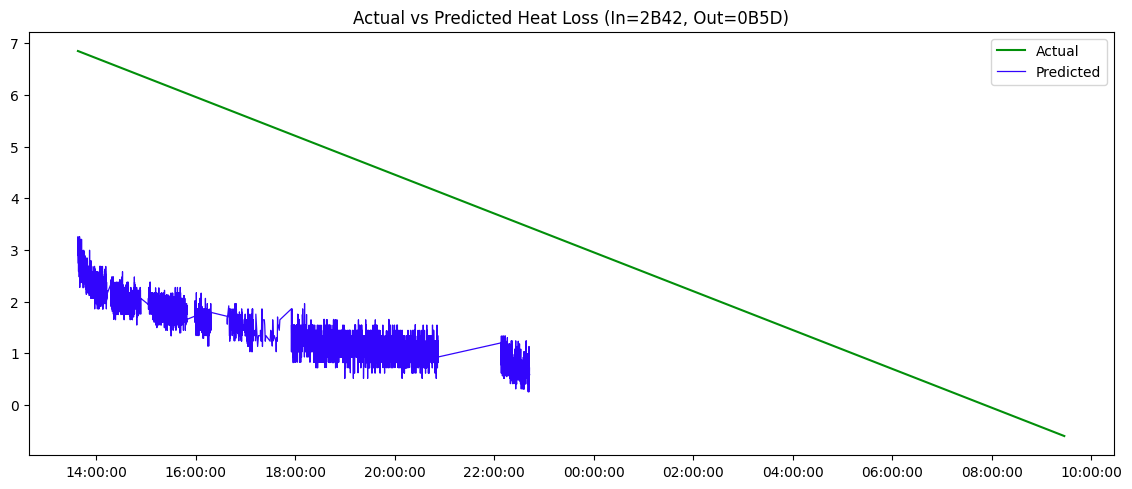

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(14, 5.5))
ax.set_title("Actual vs Predicted Heat Loss (In=2B42, Out=0B5D)")

ax.plot(water['Time'], -1.0 * water['AHL'], label='Actual', color='#028F0A', linewidth=1.5 )
ax.plot(new_every, diff, label='Predicted', color='#3205FC', linewidth=0.9 )
# ax.plot(previous_time, -1.0 * np.array(previous), label='Previous', color='#d10202', linewidth=1.5 )

ax.legend()
ax.xaxis.set_major_formatter( mdates.DateFormatter('%H:%M:%S') )